In [1]:
import numpy as np
import cv2
import dlib
from face_lib import shape2points
import matplotlib.pyplot as plt
from skimage import transform
from face_lib import crop_face
import matplotlib.pyplot as plt

## Notebook for testing image preprocessing

### Basically a copy of exercise 1 :

(Implemented this approach in image_preprocessor.py)

In [2]:
# 1. Load the landmark position of the standard face model from a csv file and store them in standard_model
def load_landmarks_from_csv(
    file_name: str
) -> np.ndarray:
    """
    Reads landmarks from a csv file.
    Arguments
    file_name : A csv file with landmarks
    Returns
    numpy array with the landmarks
    """
    standard_model = np.zeros((68, 2))
    with open(file_name, "r") as f:
        for i, line in enumerate(f.readlines()):
            line_split = line.replace("\n", "").split(",")
            standard_model[i] = [float(value) for value in line_split]
    # Multiply with 500 (width) as the landmarks are normalized
    standard_model *= 500
    return standard_model


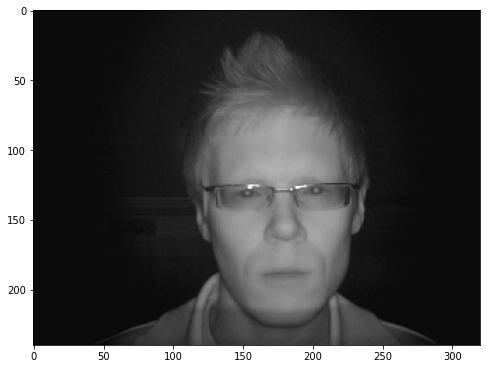

In [3]:
#Plot original image
img = plt.imread(r"C:\Users\venla\Documents\Affective_computing\Project\OriginalImg\NI\Dark\P001\Anger\000.jpeg")
plt.figure(figsize=(8, 8))

plt.imshow(img)

In [4]:
# Load Dlib’s face detector and shape predictor (landmarks)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
standard_model = load_landmarks_from_csv("mean.csv")

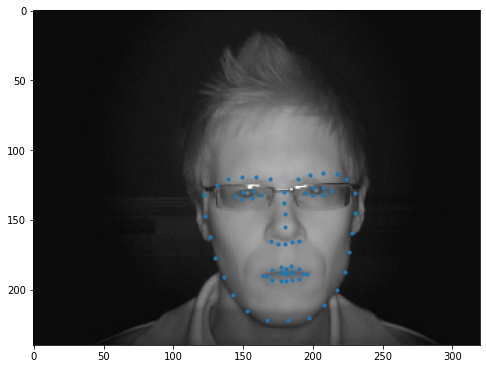

In [6]:

# 4. Detect face, return rectangles, each rectangle corresponds to one face.
# You need to fill the missing argument of this function
dets = detector(img, 1)


# 5. Extract the shape of the face in the first rectangle (using the first element of the rectangles variable)
shape = predictor(img, dets[0])


# 6. Extract facial landmarks from shape by calling the shape2points() function.
#landmarks = shape2points(shape)
landmarks = np.array([[p.x, p.y] for p in shape.parts()])


# 7. Visualize the landmarks (keypoints) by first plotting the image and then using plt.scatter() for the landmarks
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10)
plt.show()

In [11]:


# 2. Calculating the transorfmation between the two set of points 
# 2.1 Instantiating a PolynomialTransform() transform function
trans = transform.PolynomialTransform()

# 2.2 Calculating the transformation by calling the estimate() method.
#     You do not need to retuern any value after calling this methods,
#     because the transformation parameter is store in the object you instantiated after calling this methods.
trans.estimate(standard_model, landmarks)

# 3. Warp the example image using the transform.warp() function
registered_img = transform.warp(img, trans, output_shape=(600,500))
# warp_matrix = cv2.getAffineTransform(
#             np.float32(landmarks[:3]),  # Select three points from landmarks
#             np.float32(standard_model[:3])
#         )
# registered_img = cv2.warpAffine(img, warp_matrix, (500, 600))

# 4. Crop the face from registered image using the provided crop_face function.
cropped_registered_face = crop_face(registered_img, standard_model)

# 5. Croping the face from the example image using detected landmarks.
cropped_example_face = crop_face(img, landmarks)

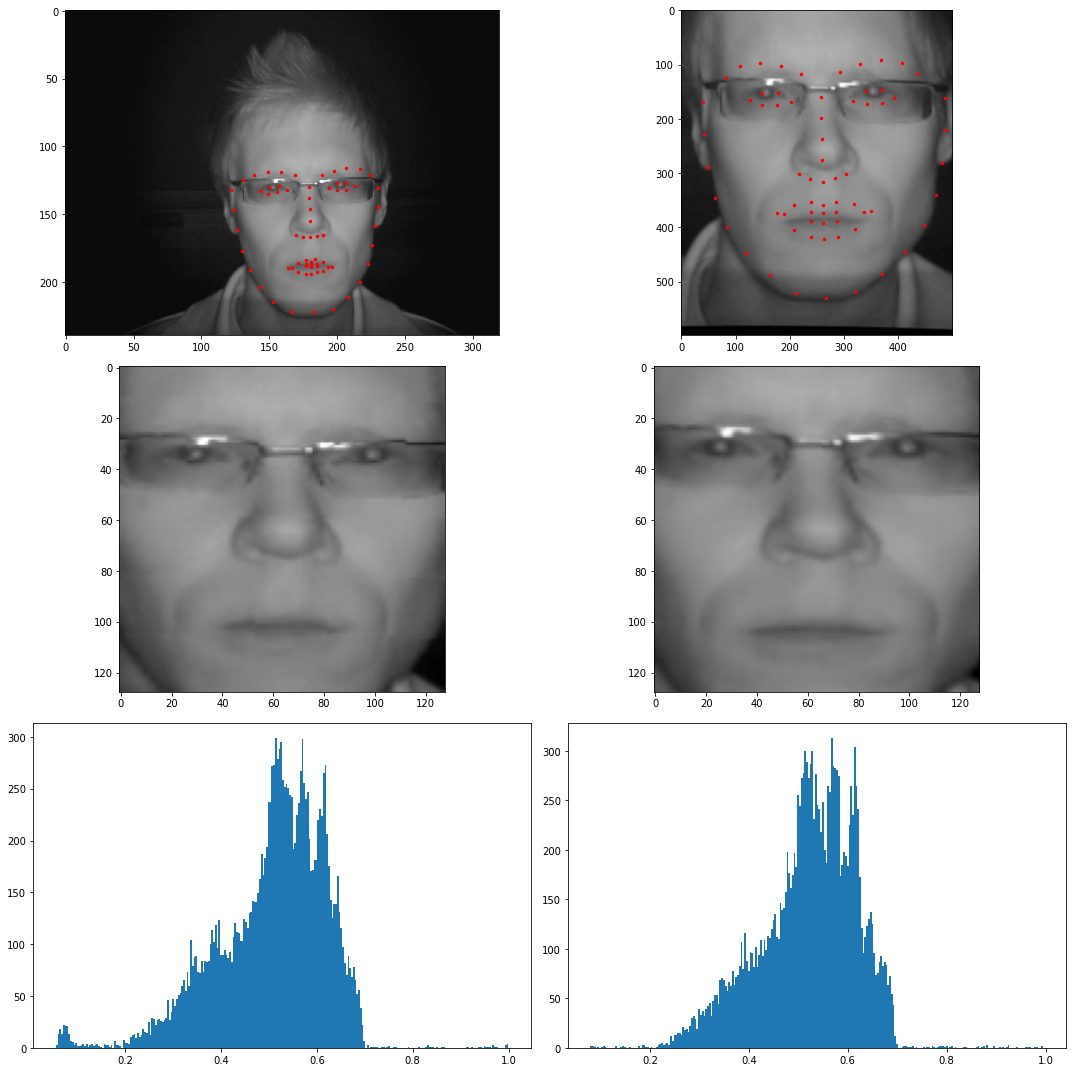

In [12]:
# Constructing figure with 2x3 subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# subplot [0,0]: show the original example image
ax[0, 0].imshow(img)


# Placing detected landmarks on subplot [0,0], we provide an exmaple to do this.
ax[0, 0].scatter(landmarks[:, 0], landmarks[:, 1], c="red", s=6)

    
# subplot [1,0]: show the face cropped from the example image.
ax[1, 0].imshow(cropped_example_face, "gray")


# subplot [2,0]: show the histogram of the face cropped from the example image.
ax[2, 0].hist(cropped_example_face.ravel(), bins=256)

# subplot [0,1]: show the registered image
ax[0, 1].imshow(registered_img)

# place the model landmarks on the registered image   
ax[0, 1].scatter(standard_model[:, 0], standard_model[:, 1], c="red", s=6)

# subplot [1,1]: show the face cropped from the registered image
ax[1, 1].imshow(cropped_registered_face, "gray")

# subplot [2,1]: show the histogram of the face cropped from the registered image.
ax[2, 1].hist(cropped_registered_face.ravel(), bins=256)

fig.tight_layout()
plt.show()